# Data Preprocessing and Classification Notebook

This notebook demonstrates how to load the `train.csv` dataset, perform cleaning and preprocessing and train a Random Forest model. We will also display intermediate results and evaluation metrics.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data
We load the dataset from the file `train.csv` and use a sample to reduce memory usage.


In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\nicol\OneDrive\Escritorio\ai_data\train.csv')
df_sample = df.head(20000)
print("Data shape:", df_sample.shape)
display(df_sample.head())

Data shape: (20000, 21)


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## Select Relevant Columns
We select a subset of columns for modeling. The target variable is `RENDIMIENTO_GLOBAL` and the features include both categorical and numerical columns.


In [3]:
selected_columns = [
    "ESTU_PRGM_ACADEMICO",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEINTERNET",
    "FAMI_EDUCACIONPADRE",
    "FAMI_TIENECOMPUTADOR",
    "coef_1", "coef_2", "coef_3", "coef_4"
]

X_sample = df_sample[selected_columns]
y_sample = df_sample["RENDIMIENTO_GLOBAL"]

# Fill missing values for features. In categorical columns we use "unknown"
X_sample_filled = X_sample.fillna("unknown")

## Preprocess Categorical Data
We use one-hot encoding for the categorical features for clarity.
Define the categorical and numerical columns for processing.

In [4]:
cat_cols = [
    "ESTU_PRGM_ACADEMICO",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEINTERNET",
    "FAMI_EDUCACIONPADRE",
    "FAMI_TIENECOMPUTADOR"
]

num_cols = ["coef_1", "coef_2", "coef_3", "coef_4"]

# One-hot encode the categorical columns.
X_cat = pd.get_dummies(X_sample_filled[cat_cols], drop_first=True)
print("Categorical features after one-hot encoding:")
display(X_cat.head())

Categorical features after one-hot encoding:


,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,ESTU_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION BANCARIA Y FINANCIERA,...,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE_unknown,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENECOMPUTADOR_unknown
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


## Preprocess Numerical Data
We convert numerical columns to float, replace string "na" values with NaN, impute missing values using the mean strategy, and then standardize them.

In [5]:
X_num = X_sample_filled[num_cols].replace("na", np.nan).astype(float)
# Summary of raw numerical data
print("Raw numerical features summary:")
display(X_num.describe())

imputer = SimpleImputer(strategy="mean")
X_num_imputed = imputer.fit_transform(X_num)

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num_imputed)
# Summary after scaling
print("Scaled numerical features summary:")
display(pd.DataFrame(X_num_scaled, columns=num_cols).describe())

Raw numerical features summary:


,coef_1,coef_2,coef_3,coef_4
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.269049,0.258997,0.261927,0.262447
std,0.122090,0.093106,0.059441,0.068353
min,0.000000,0.000000,0.000000,0.000000
25%,0.204000,0.212000,0.255000,0.255000
50%,0.241000,0.252000,0.276000,0.284000
75%,0.314000,0.308000,0.294000,0.302000
max,0.657000,0.487000,0.320000,0.332000


Scaled numerical features summary:


,coef_1,coef_2,coef_3,coef_4
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,1.474376e-17,-2.760459e-16,-6.995293e-16,1.504574e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-2.203750e+00,-2.781799e+00,-4.406608e+00,-3.839686e+00
25%,-5.328063e-01,-5.047761e-01,-1.165344e-01,-1.089535e-01
50%,-2.297429e-01,-7.514926e-02,2.367658e-01,3.153259e-01
75%,3.681929e-01,5.263284e-01,5.395945e-01,5.786718e-01
max,3.177672e+00,2.448909e+00,9.770137e-01,1.017582e+00


## Combine Processed Features
The final feature set is constructed by concatenating the one-hot encoded categorical features with the standardized numerical features.

In [6]:
import numpy as np
X_final_sample = np.hstack([X_cat.values, X_num_scaled])
print("Final feature matrix shape:", X_final_sample.shape)

Final feature matrix shape: (20000, 766)


## Split Data and Train Model
We split the data into training and testing sets, then train a Random Forest classifier.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample
)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

We predict labels for the test set and evaluate the model using accuracy and a detailed classification report.
Additionally, a bar plot shows the predicted distribution of performance levels.

Accuracy: 0.356
              precision    recall  f1-score   support

        alto       0.44      0.51      0.48      1010
        bajo       0.38      0.42      0.40       985
  medio-alto       0.28      0.24      0.26       991
  medio-bajo       0.29      0.25      0.27      1014

    accuracy                           0.36      4000
   macro avg       0.35      0.36      0.35      4000
weighted avg       0.35      0.36      0.35      4000



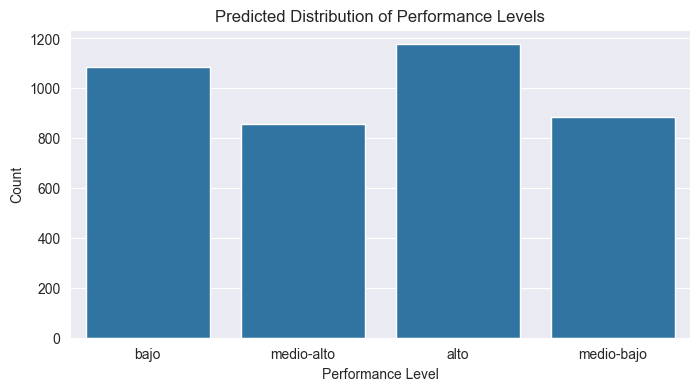

In [8]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)

# Plot the distribution of predictions, final
plt.figure(figsize=(8, 4))
sns.countplot(x=y_pred)
plt.title('Predicted Distribution of Performance Levels')
plt.xlabel('Performance Level')
plt.ylabel('Count')
plt.show()

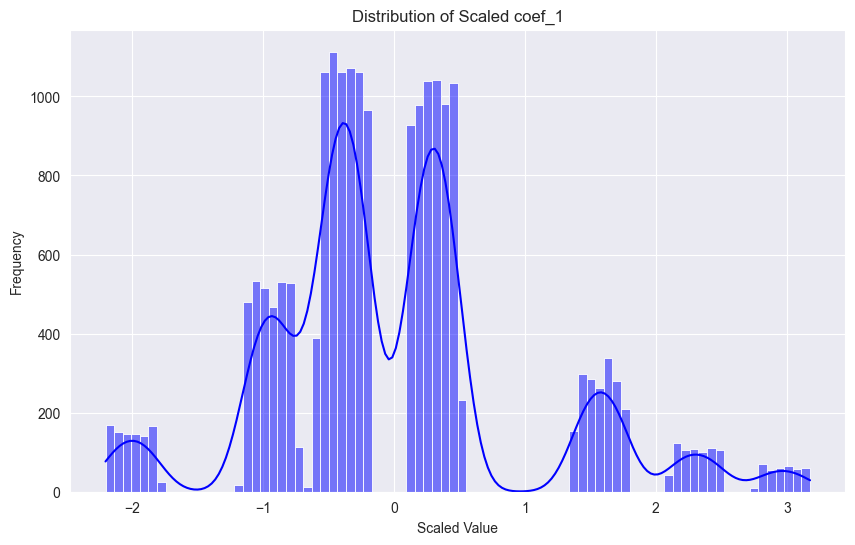

One-hot encoded categorical features:


,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,ESTU_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL,ESTU_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES,ESTU_PRGM_ACADEMICO_ADMINISTRACION BANCARIA Y FINANCIERA,...,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE_unknown,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENECOMPUTADOR_unknown
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,...,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
freq,19999,19999,19999,19999,19999,19996,19995,19986,19992,19993,...,18690,18390,16409,16221,17885,18232,19366,19331,17251,18905


In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(X_num_scaled[:, 0], kde=True, color="blue")
plt.title('Distribution of Scaled coef_1')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')
plt.show()

# Additionally, view the one-hot encoded categorical summary
print("One-hot encoded categorical features:")
display(X_cat.describe())